## Importing Libraries and Reading Data 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest    

In [2]:
data = pd.read_excel('data.xlsx') 

In [3]:
data 

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,2020-08-07 12:00:00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,2020-08-07 12:05:00,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,2020-08-07 12:10:00,908.5,916.33,-231.51,-218.09,906.2,-181.96


In [4]:
data.dtypes 

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

## Working with miscellaneous values and discarding them 

In [5]:
data.loc[data['Cyclone_Inlet_Gas_Temp'] == 'I/O Timeout'] 

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
2471,2017-01-09 13:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2472,2017-01-09 14:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2473,2017-01-09 14:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2474,2017-01-09 14:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
2475,2017-01-09 14:15:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
...,...,...,...,...,...,...,...
322814,2020-01-29 20:55:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322815,2020-01-29 21:00:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322816,2020-01-29 21:05:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout
322817,2020-01-29 21:10:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout


In [6]:
indexes = data[data['Cyclone_Inlet_Gas_Temp'] == 'I/O Timeout'].index 
indexes 

Int64Index([  2471,   2472,   2473,   2474,   2475,   2476,   2477,   2478,
              2479,   2480,
            ...
            322809, 322810, 322811, 322812, 322813, 322814, 322815, 322816,
            322817, 322818],
           dtype='int64', length=470)

In [7]:
data.drop(indexes, inplace=True)

In [8]:
data.loc[data['Cyclone_Inlet_Gas_Temp'] == 'Not Connect'] 

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
79336,2017-10-03 11:20:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
79337,2017-10-03 11:25:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
79338,2017-10-03 11:30:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
79339,2017-10-03 11:35:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
79340,2017-10-03 11:40:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
...,...,...,...,...,...,...,...
253649,2019-06-02 17:15:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
253650,2019-06-02 17:20:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
253651,2019-06-02 17:25:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect
253652,2019-06-02 17:30:00,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect,Not Connect


In [9]:
indexes_2 = data[data['Cyclone_Inlet_Gas_Temp'] == 'Not Connect'].index
indexes_2 

Int64Index([ 79336,  79337,  79338,  79339,  79340,  79341,  79342,  79343,
             79344,  79345,
            ...
            246723, 246724, 246725, 253644, 253648, 253649, 253650, 253651,
            253652, 253653],
           dtype='int64', length=723)

In [10]:
data.drop(indexes_2, inplace=True)

In [11]:
data.loc[data['Cyclone_Inlet_Gas_Temp'] == 'Scan Timeout'] 

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
80118,2017-10-06 04:30:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
81797,2017-10-12 00:25:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
82259,2017-10-13 14:55:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121079,2018-02-26 09:50:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121080,2018-02-26 09:55:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121081,2018-02-26 10:00:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121082,2018-02-26 10:05:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121083,2018-02-26 10:10:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121085,2018-02-26 10:20:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout
121086,2018-02-26 10:25:00,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout,Scan Timeout


In [12]:
indexes_3 = data[data['Cyclone_Inlet_Gas_Temp'] == 'Scan Timeout'].index 
indexes_3 

Int64Index([ 80118,  81797,  82259, 121079, 121080, 121081, 121082, 121083,
            121085, 121086, 121087, 121088, 121089, 121090, 121091, 121092,
            230596],
           dtype='int64')

In [13]:
data.drop(indexes_3, inplace=True)

In [14]:
data.loc[data['Cyclone_Inlet_Gas_Temp'] == 'Configure'] 

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
80119,2017-10-06 04:35:00,Configure,Configure,Configure,Configure,Configure,Configure
80120,2017-10-06 04:40:00,Configure,Configure,Configure,Configure,Configure,Configure
80121,2017-10-06 04:45:00,Configure,Configure,Configure,Configure,Configure,Configure
80122,2017-10-06 04:50:00,Configure,Configure,Configure,Configure,Configure,Configure
80123,2017-10-06 04:55:00,Configure,Configure,Configure,Configure,Configure,Configure
...,...,...,...,...,...,...,...
293332,2019-10-18 12:10:00,Configure,Configure,Configure,Configure,Configure,Configure
293333,2019-10-18 12:15:00,Configure,Configure,Configure,Configure,Configure,Configure
293334,2019-10-18 12:20:00,Configure,Configure,Configure,Configure,Configure,Configure
293335,2019-10-18 12:25:00,Configure,Configure,Configure,Configure,Configure,Configure


In [15]:
indexes_4 = data[data['Cyclone_Inlet_Gas_Temp'] == 'Configure'].index
indexes_4 

Int64Index([ 80119,  80120,  80121,  80122,  80123,  80124,  80125,  80126,
             80127,  80128,
            ...
             82281, 119189, 119190, 119191, 119192, 293332, 293333, 293334,
            293335, 293336],
           dtype='int64', length=108)

In [16]:
data.drop(indexes_4, inplace=True)

In [17]:
data.loc[data['Cyclone_Inlet_Gas_Temp'] == 'Comm Fail'] 

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
292844,2019-10-16 19:30:00,Comm Fail,Comm Fail,Comm Fail,Comm Fail,Comm Fail,Comm Fail
292845,2019-10-16 19:35:00,Comm Fail,Comm Fail,Comm Fail,Comm Fail,Comm Fail,Comm Fail


In [18]:
indexes_5 = data[data['Cyclone_Inlet_Gas_Temp'] == 'Comm Fail'].index
indexes_5

Int64Index([292844, 292845], dtype='int64')

In [19]:
data.drop(indexes_5, inplace=True)

## Checking the datatype of columns and converting them 

In [20]:
data.dtypes 

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [21]:
cols = data.columns.drop('time')
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce') 

## Working with null values 

In [23]:
missing_data2 = data.isnull()  
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("") 

time
False    376399
Name: time, dtype: int64

Cyclone_Inlet_Gas_Temp
False    376399
Name: Cyclone_Inlet_Gas_Temp, dtype: int64

Cyclone_Material_Temp
False    376128
True        271
Name: Cyclone_Material_Temp, dtype: int64

Cyclone_Outlet_Gas_draft
False    376398
True          1
Name: Cyclone_Outlet_Gas_draft, dtype: int64

Cyclone_cone_draft
False    376399
Name: Cyclone_cone_draft, dtype: int64

Cyclone_Gas_Outlet_Temp
False    376398
True          1
Name: Cyclone_Gas_Outlet_Temp, dtype: int64

Cyclone_Inlet_Draft
False    376397
True          2
Name: Cyclone_Inlet_Draft, dtype: int64



In [24]:
data['Cyclone_Material_Temp'].fillna(750.83, inplace=True) 
data['Cyclone_Outlet_Gas_draft'].fillna(-177.82, inplace=True)
data['Cyclone_Gas_Outlet_Temp'].fillna(715.76, inplace=True)
data['Cyclone_Inlet_Draft'].fillna(-141.3, inplace=True) 

In [25]:
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

## Exploratory Data Analysis 

In [26]:
data.describe() 

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376399.000000,376399.000000,376399.000000,376399.000000,376399.000000,376399.000000
mean,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
std,328.664814,350.794717,99.147105,90.103023,325.346014,77.615370
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.270000,867.445000,-247.190000,-226.770000,801.955000,-193.510000
50%,882.380000,913.310000,-215.260000,-198.560000,871.520000,-169.460000
75%,901.110000,943.630000,-170.130000,-143.640000,899.300000,-136.290000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [27]:
data.set_index('time', inplace=True) 

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

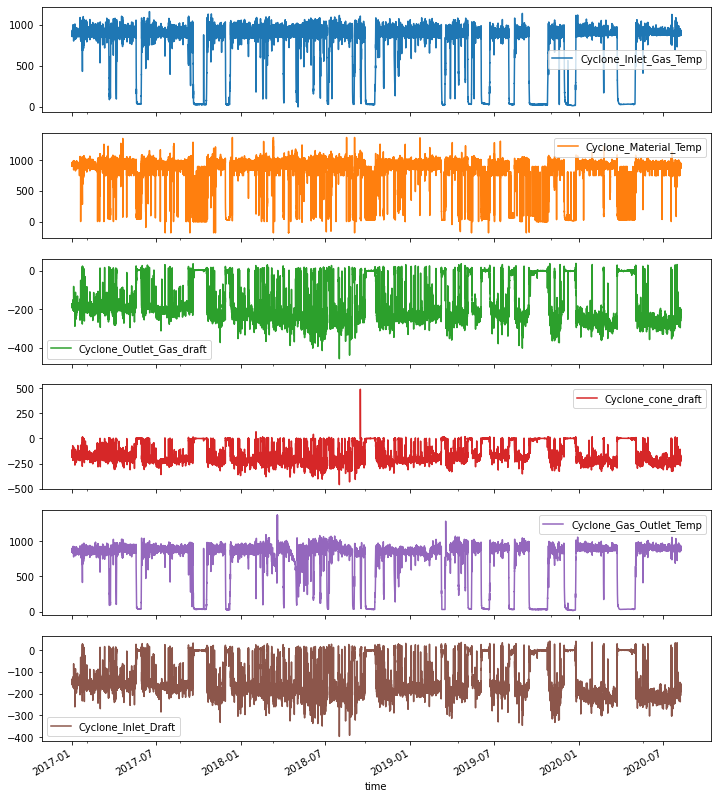

In [28]:
import matplotlib.pyplot as plt
 
# plotting the "A" column alone
data.plot(subplots=True, figsize=(12, 15)) 

#### Graph with slider (Eg: Cyclone cone draft) for periods of 6 months, 1 year, 2 year

In [ ]:
import plotly.express as px
import matplotlib as mpl

fig = px.line(data.reset_index(), x='time', y='Cyclone_cone_draft', title='Cone draft') 
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=6, label='6M', step="month", stepmode="backward"),
              dict(count=1, label="YTD",step="year", stepmode="todate"),
              dict(count=1, label="1Y", step="year", stepmode="backward"),
              dict(count=2, label='2Y', step="year", stepmode="backward"),
              dict(step="all") 
        ])
    )
)
fig.show() 

#### Making copy of dataset just to avoid any future errors 

In [30]:
df2 = data.copy() 

In [31]:
df2 

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15
2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94
2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18


## Using Isolation Forest, building model for anomaly detection 

In [32]:
outliers_fraction = float(.02)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df2.values)
df3 = pd.DataFrame(np_scaled) 

In [33]:
model =  IsolationForest(contamination=outliers_fraction, max_features=df3.shape[1] )
model.fit(df3) 

IsolationForest(contamination=0.02, max_features=6)

In [34]:
df2['anomaly'] = model.predict(df3) 

In [37]:
df2 # an anomaly score of -1 is assigned to anomalies and score of 1 to normal data. 


,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,anomaly
time,,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1
...,...,...,...,...,...,...,...
2020-08-07 11:55:00,899.42,919.79,-224.07,-209.77,901.01,-175.15,1
2020-08-07 12:00:00,879.90,895.02,-228.04,-211.28,878.08,-176.94,1
2020-08-07 12:05:00,887.20,895.70,-230.11,-214.65,885.32,-179.18,1


In [38]:
df2['anomaly'].value_counts()  

 1    368871
-1      7528
Name: anomaly, dtype: int64

## Generating plots for visualizing anomalies 

In [ ]:
fig2 = px.scatter(df2.reset_index(), x='time', y='Cyclone_cone_draft', title='Cone Draft', color='anomaly')

fig2.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=6, label='6M', step="month", stepmode="backward"),
              dict(count=1, label="YTD",step="year", stepmode="todate"),
              dict(count=1, label="1Y", step="year", stepmode="backward"),
              dict(count=2, label='2Y', step="year", stepmode="backward"),
              dict(step="all") 
        ])
    )
)
fig2.show() 

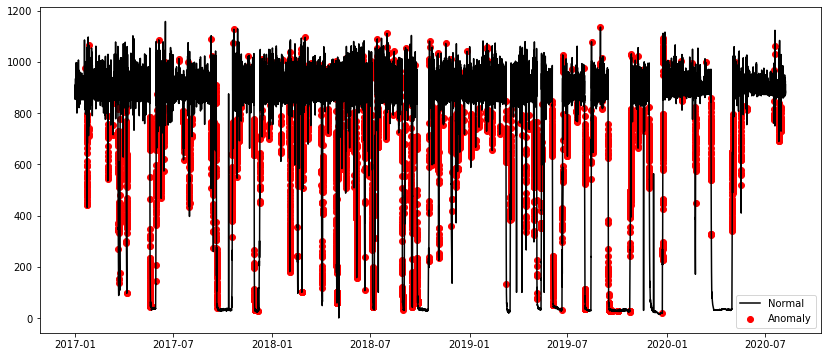

In [40]:

fig, ax = plt.subplots(figsize=(14,6))
# fig,ax2 = plt.subplots(figsize=(14,6))
# fig,ax3 = plt.subplots(figsize=(14,6))
# fig,ax4 = plt.subplots(figsize=(14,6))
# fig,ax5 = plt.subplots(figsize=(14,6))
# fig,ax6 = plt.subplots(figsize=(14,6))

a = df2.loc[df2['anomaly'] == -1, ['Cyclone_Inlet_Gas_Temp']]#anomaly 
b = df2.loc[df2['anomaly']== -1, ['Cyclone_Material_Temp']]
c = df2.loc[df2['anomaly']== -1, ['Cyclone_cone_draft']]
d = df2.loc[df2['anomaly']== -1, ['Cyclone_Outlet_Gas_draft']]
e = df2.loc[df2['anomaly']== -1, ['Cyclone_Gas_Outlet_Temp']]
f = df2.loc[df2['anomaly']== -1, ['Cyclone_Inlet_Draft']]

ax.plot(df2.index, df2['Cyclone_Inlet_Gas_Temp'], color='black', label = 'Normal')
ax.scatter(a.index,a['Cyclone_Inlet_Gas_Temp'], color='red', label = 'Anomaly')

# For plotting graphs of different variables 

# ax2.plot(df2.index, df2['Cyclone_Material_Temp'], color='black', label = 'Normal')
# ax2.scatter(b.index, b['Cyclone_Material_Temp'], color='red', label='Anomaly')

# ax3.plot(df2.index, df2['Cyclone_cone_draft'], color='black', label = 'Normal')
# ax3.scatter(c.index, c['Cyclone_cone_draft'], color='red', label='Anomaly')

# ax4.plot(df2.index, df2['Cyclone_Outlet_Gas_draft'], color='black', label = 'Normal')
# ax4.scatter(d.index, d['Cyclone_Outlet_Gas_draft'], color='red', label='Anomaly')

# ax5.plot(df2.index, df2['Cyclone_Gas_Outlet_Temp'], color='black', label = 'Normal')
# ax5.scatter(e.index, e['Cyclone_Gas_Outlet_Temp'], color='red', label='Anomaly')

# ax6.plot(df2.index, df2['Cyclone_Inlet_Draft'], color='black', label = 'Normal')
# ax6.scatter(f.index, f['Cyclone_Inlet_Draft'], color='red', label='Anomaly')

plt.legend()
plt.show(); 

In [41]:

# This code is for highlighting timestamps with anomalies in pandas.
# But since highlighting here does not highlight in output xlsx file, I highlighted directly in output.xlsx file itself 




# def highlight_otls(x):
#     c1 = 'background-color: yellow'
#     c2 = '' 

#     mask = x['anomaly'] == -1
#     df1 =  pd.DataFrame(c2, index=df2.reset_index().index, columns=df2.reset_index().columns)
#     #modify values of df1 column by boolean mask
#     df1.loc[mask, 'time'] = c1
        
#     return df1

# df2.reset_index().style.apply(highlight_otls, axis=None) 

## Generating "output.xlsx" file 

In [42]:
writer = pd.ExcelWriter("output.xlsx",
                        engine='xlsxwriter',
                        datetime_format='mmm d yyyy hh:mm:ss')
df2.reset_index().to_excel(writer, sheet_name='Sheet1') 
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Get the dimensions of the dataframe.
(max_row, max_col) = df2.reset_index().shape

# Set the column widths, to make the dates clearer.
worksheet.set_column(1, max_col, 20)

# Close the Pandas Excel writer and output the Excel file.
writer.save() 

In [43]:
# The output file ("output.xlsx") contains highglighted timestamps with anomalies 